In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [174]:
code = []
title = []
intro = []

cookies = {
    'ACEUCI': '1',
    'CheckSameSite': 'IsValidSameSiteSet',
    'AladdinUser': 'UID=-50125363&SID=4P5oPL5cRydu48l0%2b6Q1uQ%3d%3d',
    'AladdinSession': 'UID=-50125363&SID=4P5oPL5cRydu48l0%2b6Q1uQ%3d%3d',
    'AladdinUS': '8VIA9uXIEEDg0PBcYe2Wbg%3d%3d&USA=0',
    'ACEUACS': '1597764680612231040',
    'ACEFCID': 'UID-5F4875F0E779D63E9098338F',
    '_BS_GUUID': 'dNt4ok3JKAKZLWQCygDAdQYK4H7EDqBRd4VCpZla',
    '_ga': 'GA1.3.1224188238.1598584305',
    '_gid': 'GA1.3.645720543.1598584305',
    'ala_qs_use': '1',
    'pFloatingBanner': 'true',
    '_TRK_AUIDA_13987': '4862220279678af7bef6c760c9955607:2',
    '_TRK_ASID_13987': 'd44039508014a1158acc584f60cc1c04',
    'refererURL': 'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=246064543',
    '_gat_gtag_UA_59266_2': '1',
}

headers = {
    'Connection': 'keep-alive',
    'Accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Referer': 'https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=246064543',
    'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7,ja;q=0.6',
}

for i in range(1, 21): #21
    response = requests.get(f'https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=351&page={i}&cnt=1000&SortOrder=1')
    soup = BeautifulSoup(response.text, 'html.parser')
    div_tag = soup.select('form#Myform > div.ss_book_box')
    print(i, end="")
    for div in div_tag:
        a_tag = div.select_one('li > a.bo3')
        title.append(a_tag.get_text()) # 책 제목
        
        # isbn
        src=div.select_one('img.i_cover')['src']
        isbn = (src.split("cover150/")[1]).split("_")[0]
        
        a_href = a_tag['href']
        code.append(a_href.split("ItemId=")[1]) # 코드
        
        params = (
            ('ISBN', isbn),
            ('name', 'Introduce'),
            ('type', '0'),
            ('date', '14'),
        )

        response = requests.get('https://www.aladin.co.kr/shop/product/getContents.aspx', headers=headers, params=params, cookies=cookies)
        soup = BeautifulSoup(response.text, 'html.parser')
        ls = soup.select_one('div.Ere_prod_mconts_LS')
        if (ls is not None) and (ls.get_text()=='책소개'):
            div_r = soup.select_one('div.Ere_prod_mconts_R')
            if div_r is not None:
                text = div_r.get_text()
                text = text.replace('\r\n','').replace('  ','').replace('\n','')
                intro.append(text)
            elif div_r is None:
                intro.append("NULL")
        else:
            intro.append("NULL")

1234567891011121314151617181920

In [175]:
dic = {
    'code':code,
    'title':title,
    'intro':intro
}

In [176]:
import pandas as pd
df=pd.DataFrame(dic)
print(df.shape)
df.head()

(1000, 3)


,code,title,intro
0,246064543,비전공자를 위한 이해할 수 있는 IT 지식,"비전공자를 위한 'IT 기초 문법서'로, 한 번쯤 들어봤을 프로그래밍 언어, 운영체..."
1,247882118,이것이 취업을 위한 코딩 테스트다 with 파이썬,"IT 취준생이라면 누구나 가고 싶어 하는 카카오, 라인, 삼성전자의 2016년부터 ..."
2,193931483,혼자 공부하는 파이썬,"독학으로 프로그래밍 언어를 처음 배우려는 입문자가, 혹은 파이썬을 배우려는 입문자가..."
3,194830103,Do it! 점프 투 파이썬,"파이썬 4년 연속 베스트셀러 1위, 'Do it! 점프 투 파이썬'의 전면 개정판...."
4,245495826,파이썬 알고리즘 인터뷰,"현업과 실무에 유용한 주요 알고리즘 이론을 깊숙이 이해하고, 파이썬의 핵심 기능과 ..."


In [177]:
df=df[df['intro']!='NULL']
print(df.shape)

(910, 3)


In [178]:
df.to_csv('book_intro.csv', index=False)

In [3]:
df = pd.read_csv('book_intro.csv')

- count

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1,2))
count_matrix = count_vec.fit_transform(df['intro'])
print(count_matrix)
print(count_matrix.shape)

  (0, 27395)	1
  (0, 41378)	1
  (0, 2418)	2
  (0, 11963)	1
  (0, 22764)	1
  (0, 25243)	1
  (0, 18043)	1
  (0, 59708)	1
  (0, 37721)	1
  (0, 40765)	1
  (0, 13552)	1
  (0, 1593)	1
  (0, 2536)	1
  (0, 16646)	1
  (0, 42942)	1
  (0, 53637)	1
  (0, 59584)	1
  (0, 19359)	1
  (0, 2180)	1
  (0, 18364)	1
  (0, 43083)	1
  (0, 14750)	1
  (0, 51870)	1
  (0, 15424)	1
  (0, 45757)	1
  :	:
  (909, 55266)	1
  (909, 27564)	2
  (909, 41329)	1
  (909, 53396)	1
  (909, 25951)	1
  (909, 10461)	1
  (909, 29433)	2
  (909, 28353)	1
  (909, 15356)	1
  (909, 53097)	1
  (909, 59434)	1
  (909, 27566)	2
  (909, 29434)	1
  (909, 37452)	1
  (909, 28354)	1
  (909, 18705)	1
  (909, 10462)	1
  (909, 15357)	1
  (909, 25953)	1
  (909, 55268)	1
  (909, 10277)	1
  (909, 53098)	1
  (909, 46346)	1
  (909, 29435)	1
  (909, 41345)	1
(910, 64512)


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

genres_similarity = cosine_similarity(count_matrix, count_matrix)
print(genres_similarity)

similar_index = np.argsort(-genres_similarity)
print(similar_index)

[[1.         0.02858959 0.01729222 ... 0.05494505 0.01373508 0.01678599]
 [0.02858959 1.         0.00749806 ... 0.         0.         0.        ]
 [0.01729222 0.00749806 1.         ... 0.02593832 0.02161341 0.01320715]
 ...
 [0.05494505 0.         0.02593832 ... 1.         0.02060263 0.03357198]
 [0.01373508 0.         0.02161341 ... 0.02060263 1.         0.02098069]
 [0.01678599 0.         0.01320715 ... 0.03357198 0.02098069 1.        ]]
[[  0 515 341 ... 779 307 454]
 [  1 713 787 ... 683 691 909]
 [  2  25  51 ... 304 829 475]
 ...
 [907 755 359 ...  61 794 454]
 [908  76  18 ... 249 132  95]
 [909 443  13 ... 473 477 454]]


In [6]:
input_book = input()

book_index = df[df['title']==input_book].index.values
print(book_index)

similar_book = similar_index[book_index, 1:int(100)]

similar_book_index = similar_book.reshape(-1) # 차원 맞춰준다
# print(similar_book_index)
# print(df.iloc[similar_book_index])

 Do it! 점프 투 파이썬


[3]


In [254]:
# dic = { }
# a = df.loc[similar_book_index]['title']
# for i,j in enumerate(a):
#     dic[j] = i
# dic

In [7]:
print(similar_index[int(book_index)][1:100])
similar_list = genres_similarity[int(book_index)]
similar_list = sorted(similar_list, reverse=True)[1:100]
print(similar_list)
dic = { }
a = df.loc[similar_book_index]['title']
for i,j in zip(a, similar_list):
    dic[i] = j
# dic

[184 255  35 473  60 285 847  37 614  10 320 619  47  24 325 891 901 787
 802 231 142 482 308 725 890 470 492 340 648 404 794 151  77 713  52 805
 405 295  78 130  48 854 201 666 863 486 257  17 102 242  32 426 262  79
  93   1 385 608  92  56 432 524 301 271 300  99 134 355 824 172 436  20
 125 379 621  19 518 109 737 381 214  63 386  89 164 263 215 773 727 279
 716 551 680  62 881 719 278 160 694]
[0.14600594431765873, 0.11051315654341975, 0.10956683294441906, 0.10333338939530026, 0.0932026535691012, 0.08841830950220184, 0.08793907394316508, 0.08700352526782731, 0.08633987312688741, 0.08436643995440338, 0.08337677004899251, 0.08195547097111071, 0.08183392107431048, 0.08150555753522692, 0.08036489564492522, 0.0797122377988933, 0.07966926237778117, 0.07892217978671841, 0.07727955783854681, 0.0770348357108795, 0.0758119828944472, 0.07522199740629593, 0.07453046647449882, 0.07433448501693404, 0.0740822042545479, 0.07353139955648426, 0.07272339848781455, 0.07233408699097388, 0.07194989427

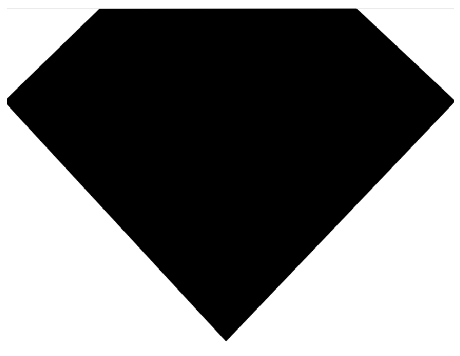

In [10]:
from PIL import Image

mask_book = np.array(Image.open('book3.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask_book, interpolation='nearest')
plt.axis('off') # x, y 축 숫자 제거
plt.show()

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

my_wc = WordCloud(font_path=r'C:\Users\jh020\Downloads\Install\SDMiSaeng.ttf', 
                  background_color="lightpink", mode="RGBA",
                  mask=mask_book)

my_wc=my_wc.generate_from_frequencies(dic)
# my_wc.words_

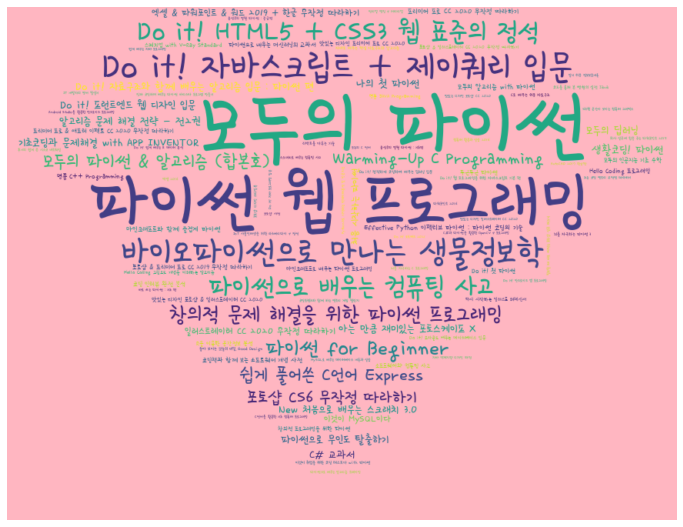

In [63]:
plt.figure(figsize=(12,12))
plt.imshow(my_wc, interpolation='bilinear',)
plt.axis('off') # x, y 축 숫자 제거
plt.show()